<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S2_C5_RDG_Marketing_target_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Implementing RGD

## Activity 1: Import Necessary Libraries

In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas

## Activity 2: Load and Explore the Dataset

In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')

#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl']

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


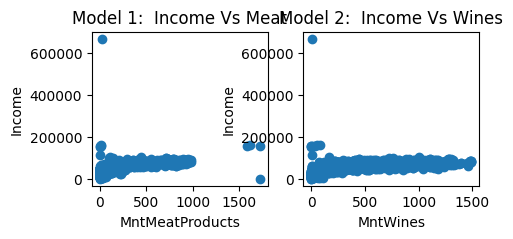

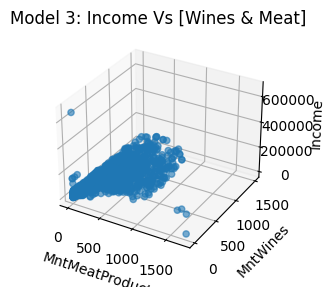

In [ ]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('Model 1:  Income Vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')


plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2:  Income Vs Wines')
plt.xlabel('MntWines')
plt.ylabel('Income')

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MntMeatProducts'],df['MntWines'],df['Income'], alpha = 0.6)
ax.set_xlabel('MntMeatProducts')
ax.set_ylabel('MntWines')
ax.set_zlabel('Income')
ax.set_title('Model 3: Income Vs [Wines & Meat]')
plt.show()

## Activity 3: Preprocess Data

In [ ]:
# --- >  Eliminar datos átipicos de Income
#---------------------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntMeatProducts
#---------------------------------------
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntWines
#---------------------------------------
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

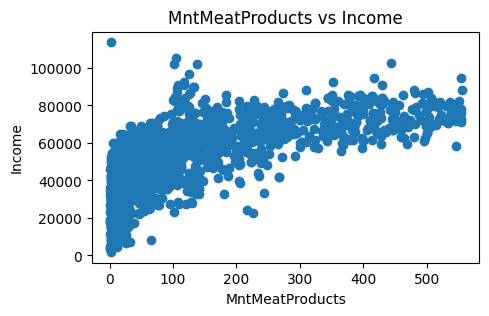

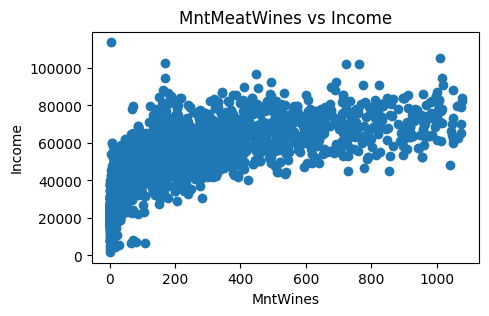

In [ ]:

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

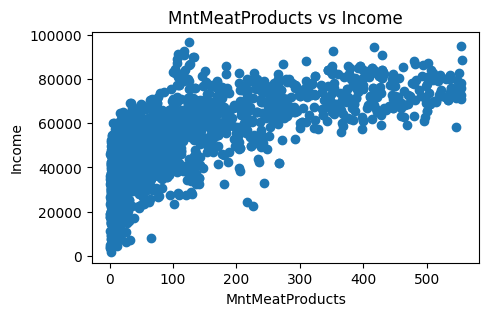

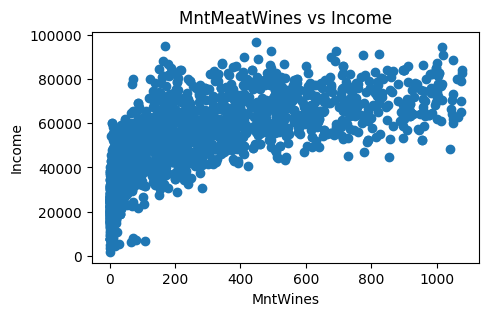

In [ ]:
df = df[df['Income']< 100000]

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# Activity 4: Implement a Gradient Descent Regression Iteration

In [ ]:
# Inicializar parámetros
theta = 80
intercept = 5000

In [ ]:
# y = b + mX
# h = b + Theta(X1)
# h = theta_0 + theta_1(X1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

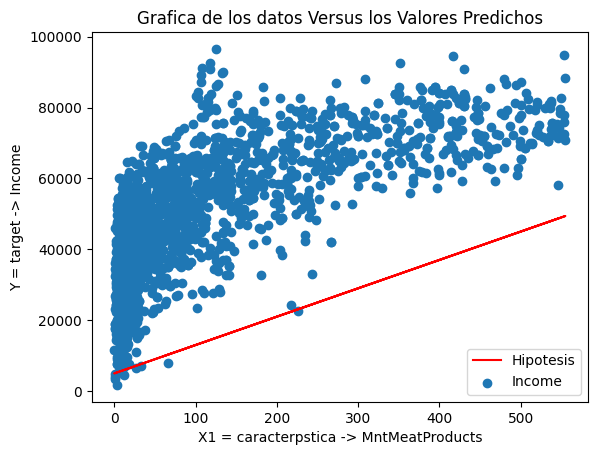

In [ ]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = caracterpstica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule el error cuadratico medio MSE = cost = lost
# MSE = ((h-y)^2)/m
h = df['Hipotesis']
Y = df['Income']
X1 = df['MntMeatProducts']
m = len(df)
MSE = np.mean((h-Y)**2)
MSE = print( f'El error cuadratico medio es: {round(MSE,2)}')

El error cuadratico medio es: 1365248812.66


In [ ]:
# Actualice los parámetros
theta_0 = intercept
theta_1 = theta
alpha = 0.0001 # Este valor entre 0 y 1

In [ ]:
theta_0

5000

In [ ]:
# Actualización de theta_0
theta_0 = theta_0 - alpha * (2/m) * np.sum((h-Y))
theta_0

5006.875806278481

In [ ]:
theta_1

80

In [ ]:
# Actualización de theta_1
theta_1 = theta_1 - alpha * (2/m) * np.dot(X1.T,(h-Y))
theta_1

931.7064279493671

In [ ]:
# Visualice la nueva recta

In [ ]:
H_new = theta_0 + theta_1 * X1

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

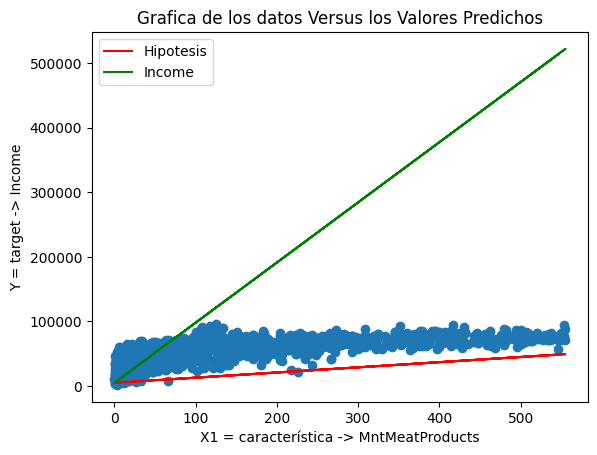

In [ ]:

plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.plot(df['MntMeatProducts'],H_new,color='green')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule la bondad de ajuste
SSE = np.sum((H_new-Y)**2)
Y_mean = np.mean(Y)
SST = np.sum((Y-Y_mean)**2)
R2 = 1 - (SSE/SST)
R2

-46.011471492207995

In [ ]:
theta = np.random.randn(2,1)

In [ ]:
theta

array([[ 0.14265869],
       [-0.44319854]])

# Actividad 5. Implement a Gradient Descent Regression function

In [ ]:
from statsmodels.tools.tools import add_constant

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.0001
n_iteraciones = 100

## Activity 5.1: Define Cost Function

In [ ]:
def cost_function(H,Y):
  #MSE = np.mean((h-Y)**2)
  # np.mean : calcula media aritmética de los elemntos
  cost = np.mean((H-Y)**2)
  return cost

In [ ]:
# Esta función no está terminada se terminará en la siguiente clase
# Inicializar parámetros
def my_RGD(Y,X1,alpha,n_iteraciones):
  theta = np.random.randn(3,1) #
  print('Parámetros iniciales')
  print(theta)
  # H = tetha_0*(1) + tetha_1*X1
  ## H = tetha_0*(1) + tetha_1*X1 + tetha_2*X1**2

  # la constante es necesaria para la multiplicación del vector de parámetros con la matriz de las caracteristicas
  X1 = np.c_[X1, X1**2]
  X1 = add_constant(X1)
  # Convirtiendo a un array - vector columna (m,1)
  Y = np.reshape(Y,(-1,1))

  cost_history = np.zeros(n_iteraciones)

  for i in range(n_iteraciones):
    # H = tetha_0*(1) + tetha_1*X1
    H = np.dot(X1,theta)
    # llamando la función que calcula el del costo
    cost_function(H,Y)

    # Guarda los valores del costo en la iteracion i-ésima
    cost_history[i] = cost_function(H,Y)

    # Actualización de paramatero
    theta = theta - alpha * (1/m) * np.dot(X1.T,(H-Y))

  return theta, cost_history

# Activity 6: Initialize Parameters and Run

Parámetros iniciales
[[ 0.06534492]
 [-0.42393739]
 [ 0.76523488]]
Parámetros finales
[[ 0.06534493]
 [-0.42456078]
 [ 0.16825669]]
Costo mínimo
1719249895.4134712
Iteración
349


Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

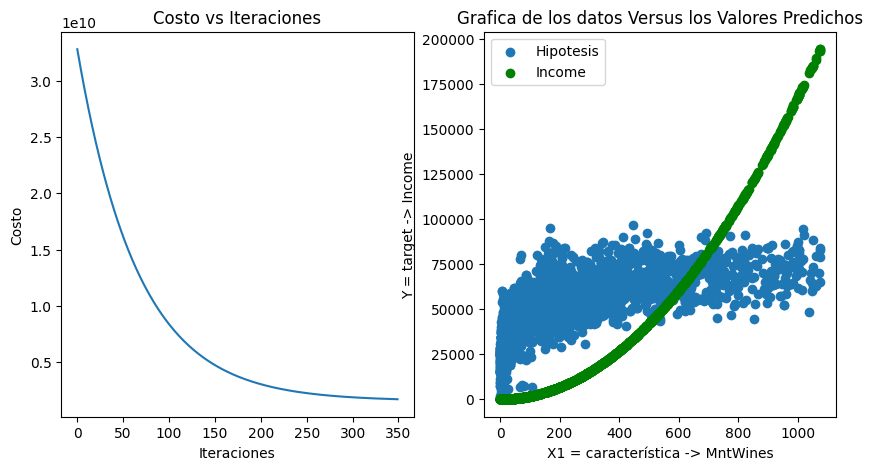

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntWines']
# Hiperparámetro
alpha = 0.0000000000001
n_iteraciones = 350

tetha_final, cost_hys = my_RGD(Y,X1,alpha,n_iteraciones)

# Predicción con los parámetros finales
H_final = tetha_final[0] + tetha_final[1] * X1 + tetha_final[2] * X1**2
print('Parámetros finales')
print(tetha_final)
print('Costo mínimo')
min_cost = np.min(cost_hys)
print(min_cost)
print('Iteración')
print(np.argmin(cost_hys))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cost_hys)
plt.title('Costo vs Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.scatter(df['MntWines'],H_final, color='green')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntWines')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

# Activity 7: Plot Cost Function over Iterations

In [ ]:
cost_hys

array([3.27868726e+10, 3.23151971e+10, 3.18506473e+10, 3.13931157e+10,
       3.09424961e+10, 3.04986843e+10, 3.00615773e+10, 2.96310738e+10,
       2.92070742e+10, 2.87894801e+10, 2.83781947e+10, 2.79731228e+10,
       2.75741704e+10, 2.71812452e+10, 2.67942561e+10, 2.64131134e+10,
       2.60377287e+10, 2.56680151e+10, 2.53038870e+10, 2.49452598e+10,
       2.45920506e+10, 2.42441775e+10, 2.39015598e+10, 2.35641182e+10,
       2.32317744e+10, 2.29044515e+10, 2.25820736e+10, 2.22645660e+10,
       2.19518551e+10, 2.16438684e+10, 2.13405347e+10, 2.10417835e+10,
       2.07475456e+10, 2.04577529e+10, 2.01723383e+10, 1.98912355e+10,
       1.96143794e+10, 1.93417060e+10, 1.90731519e+10, 1.88086549e+10,
       1.85481538e+10, 1.82915882e+10, 1.80388987e+10, 1.77900266e+10,
       1.75449143e+10, 1.73035051e+10, 1.70657429e+10, 1.68315727e+10,
       1.66009402e+10, 1.63737919e+10, 1.61500753e+10, 1.59297384e+10,
       1.57127302e+10, 1.54990005e+10, 1.52884997e+10, 1.50811790e+10,
      

# Activity 8: split sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.0000000001
n_iteraciones = 5

In [ ]:
# test_size =elprorcentaje de datos que voy a dejar para probar
# en este caso usamos una combinacion
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,test_size=0.2, random_state=42)

Parámetros iniciales
[[ 0.38084344]
 [-0.0785097 ]
 [-0.99366891]]
Parámetros finales
[[ 0.38086937]
 [-0.07418022]
 [ 0.40604693]]
Costo mínimo
1733014269.8625448
Iteración
4


Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

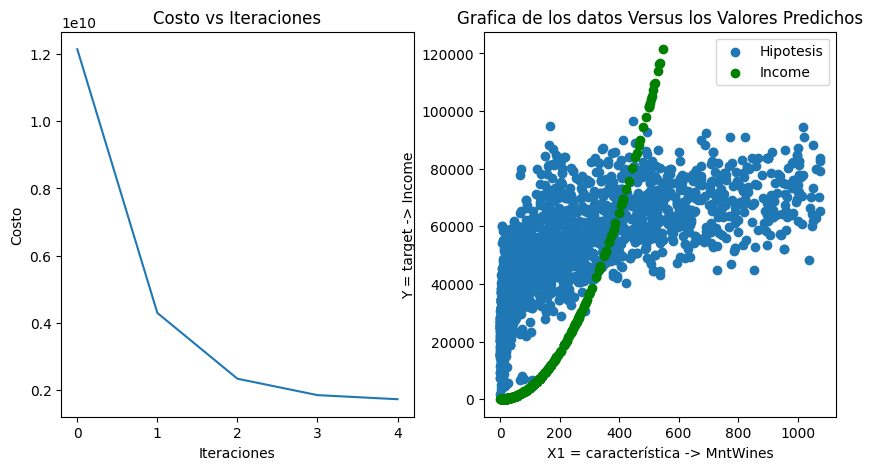

In [ ]:
tetha_final, cost_hys = my_RGD(Y,X1,alpha,n_iteraciones)

# Predicción con los parámetros finales
H_final = tetha_final[0] + tetha_final[1] * X_test + tetha_final[2] * X_test**2
print('Parámetros finales')
print(tetha_final)
print('Costo mínimo')
min_cost = np.min(cost_hys)
print(min_cost)
print('Iteración')
print(np.argmin(cost_hys))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cost_hys)
plt.title('Costo vs Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.scatter(X_test,H_final, color='green')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntWines')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
#librerias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df[['MntMeatProducts']]
# Hiperparámetro se ajustan con las librerias

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,test_size=0.2, random_state=42)



In [ ]:
X_train

,MntMeatProducts
219,137
1111,137
1845,100
368,5
1501,40
...,...
1268,239
1449,75
964,77
1635,28


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

In [ ]:
X_train_poly # theta0

array([[1.0000e+00, 1.3700e+02, 1.8769e+04],
       [1.0000e+00, 1.3700e+02, 1.8769e+04],
       [1.0000e+00, 1.0000e+02, 1.0000e+04],
       ...,
       [1.0000e+00, 7.7000e+01, 5.9290e+03],
       [1.0000e+00, 2.8000e+01, 7.8400e+02],
       [1.0000e+00, 1.1000e+01, 1.2100e+02]])

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
# Crear y entrenar el modelo de regresión lineal con características polinómicas
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression()

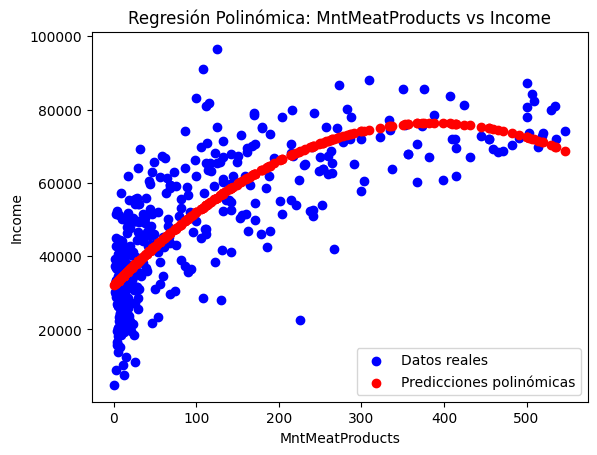

In [ ]:
# Visualizar los resultados (ajuste del modelo polinómico)
y_pred_poly = poly_model.predict(X_test_poly)
X_test_poly = poly.transform(X_test)

plt.scatter(X_test, Y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicciones polinómicas')
plt.title('Regresión Polinómica: MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.legend()
plt.show()